In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banana-quality-dataset/banana_quality_dataset.csv


# **Import**

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & EDA**

In [3]:
df = pd.read_csv('/kaggle/input/banana-quality-dataset/banana_quality_dataset.csv')

* ample_id: A unique identifier assigned to each banana sample in the dataset. This allows the samples to be tracked and referenced uniquely.
* variety: The cultivar or breed of banana, such as Cavendish, Red Dacca, or Lady Finger. Knowing the specific banana variety provides context about the sample's physical characteristics and growing conditions.
* region: The geographic origin of the banana, such as Ecuador, Philippines, or Costa Rica. The region can influence factors like climate, soil, and growing practices that impact the banana's qualities.
* quality_score: A numerical score, likely on a scale of 1-4 that rates the overall quality of the banana sample. This could encompass factors like appearance, texture, and lack of defects.
* quality_category: A text label that categorizes the quality score into broader groupings like "Excellent" etcThis provides an easier-to-understand quality assessment.
* ripeness_index: A numerical index representing the ripeness level of the banana, potentially ranging from 1 (green/unripe) to 10 (overripe). This quantifies the maturity of the fruit.
* ripeness_category: A text label like "Green", "Yellow", "Ripe", or "Overripe" that corresponds to the ripeness index. This gives a clear, qualitative ripeness classification.
* sugar_content_brix: The sugar content of the banana measured in degrees Brix. This is a common way to assess the sweetness and quality of the fruit.
* firmness_kgf: The firmness of the banana measured in kilograms-force. This indicates the texture and maturity of the sample.
* length_cm: The physical length of the banana in centimeters. This size metric can vary by variety and 
ary by variety and growing conditions.owing conditions.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sample_id           1000 non-null   int64  
 1   variety             1000 non-null   object 
 2   region              1000 non-null   object 
 3   quality_score       1000 non-null   float64
 4   quality_category    1000 non-null   object 
 5   ripeness_index      1000 non-null   float64
 6   ripeness_category   1000 non-null   object 
 7   sugar_content_brix  1000 non-null   float64
 8   firmness_kgf        1000 non-null   float64
 9   length_cm           1000 non-null   float64
 10  weight_g            1000 non-null   float64
 11  harvest_date        1000 non-null   object 
 12  tree_age_years      1000 non-null   float64
 13  altitude_m          1000 non-null   float64
 14  rainfall_mm         1000 non-null   float64
 15  soil_nitrogen_ppm   1000 non-null   float64
dtypes: floa

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sample_id,1000.0,500.50000,288.819436,1.00,250.7500,500.500,750.2500,1000.00
quality_score,1000.0,2.46516,0.540909,0.92,2.0900,2.440,2.8500,3.89
ripeness_index,1000.0,4.04217,1.753211,1.02,2.4475,4.110,5.5625,7.00
sugar_content_brix,1000.0,18.51683,2.034812,15.00,16.8275,18.500,20.3125,21.98
firmness_kgf,1000.0,2.70684,1.289252,0.50,1.5900,2.680,3.8200,5.00
length_cm,1000.0,19.88210,5.736318,10.00,14.9025,19.890,24.8000,29.95
weight_g,1000.0,164.73893,49.163073,81.05,122.3975,163.365,205.7750,249.89
tree_age_years,1000.0,10.87960,5.215554,2.00,6.3000,10.700,15.6000,20.00
altitude_m,1000.0,723.55670,427.372855,0.40,353.9500,726.000,1071.7250,1498.40
rainfall_mm,1000.0,1972.99280,564.467912,1000.50,1498.7500,1957.400,2431.8000,2992.00


**Missing Value Check**

In [6]:
df.isna().sum()

sample_id             0
variety               0
region                0
quality_score         0
quality_category      0
ripeness_index        0
ripeness_category     0
sugar_content_brix    0
firmness_kgf          0
length_cm             0
weight_g              0
harvest_date          0
tree_age_years        0
altitude_m            0
rainfall_mm           0
soil_nitrogen_ppm     0
dtype: int64

**Duplicated value check**

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7


# **2. Data Transform for Visualize**

In [9]:
df['harvest_date'] = pd.to_datetime(df['harvest_date'])

In [10]:
df['harvest_month'] = df['harvest_date'].dt.month

In [11]:
df.head()

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm,harvest_month
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6,10
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8,10
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7,9
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8,10
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7,10


# **3. Data Visualization**

In [12]:
num_cols = df.select_dtypes(include = ['int64','float64']).drop(columns=['sample_id']).columns
cat_cols = df.select_dtypes(exclude = ['int64','float64']).drop(columns=['harvest_date']).columns

## **Histogram**

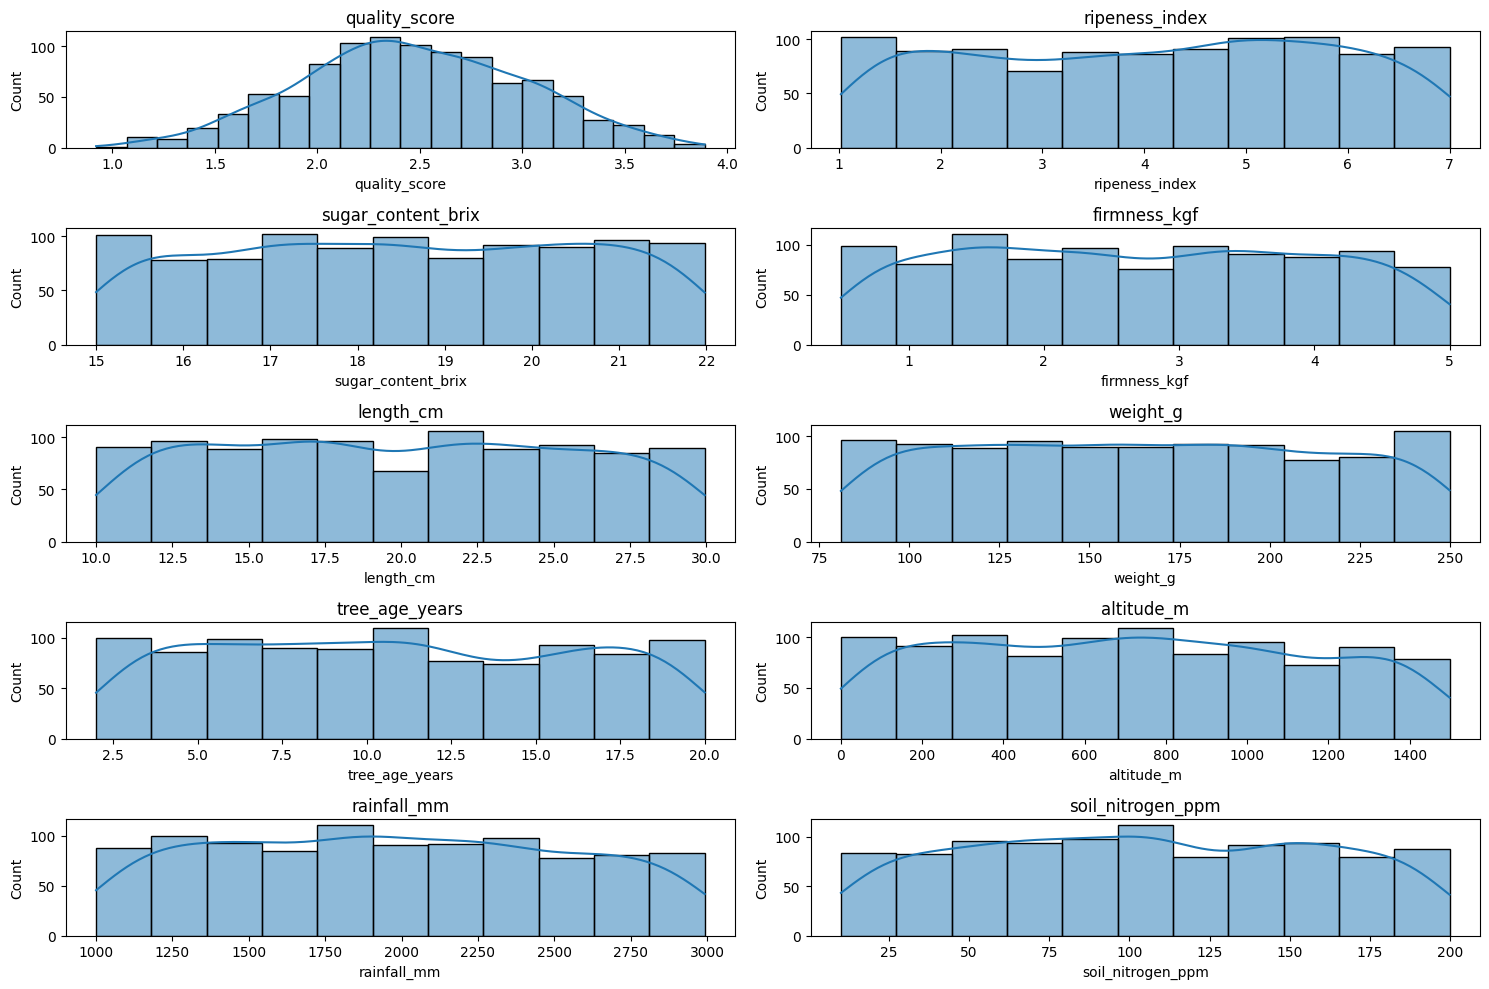

In [13]:
f, ax = plt.subplots(5,2, figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data = df, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)

plt.tight_layout()
plt.show() 

## **Boxplot**

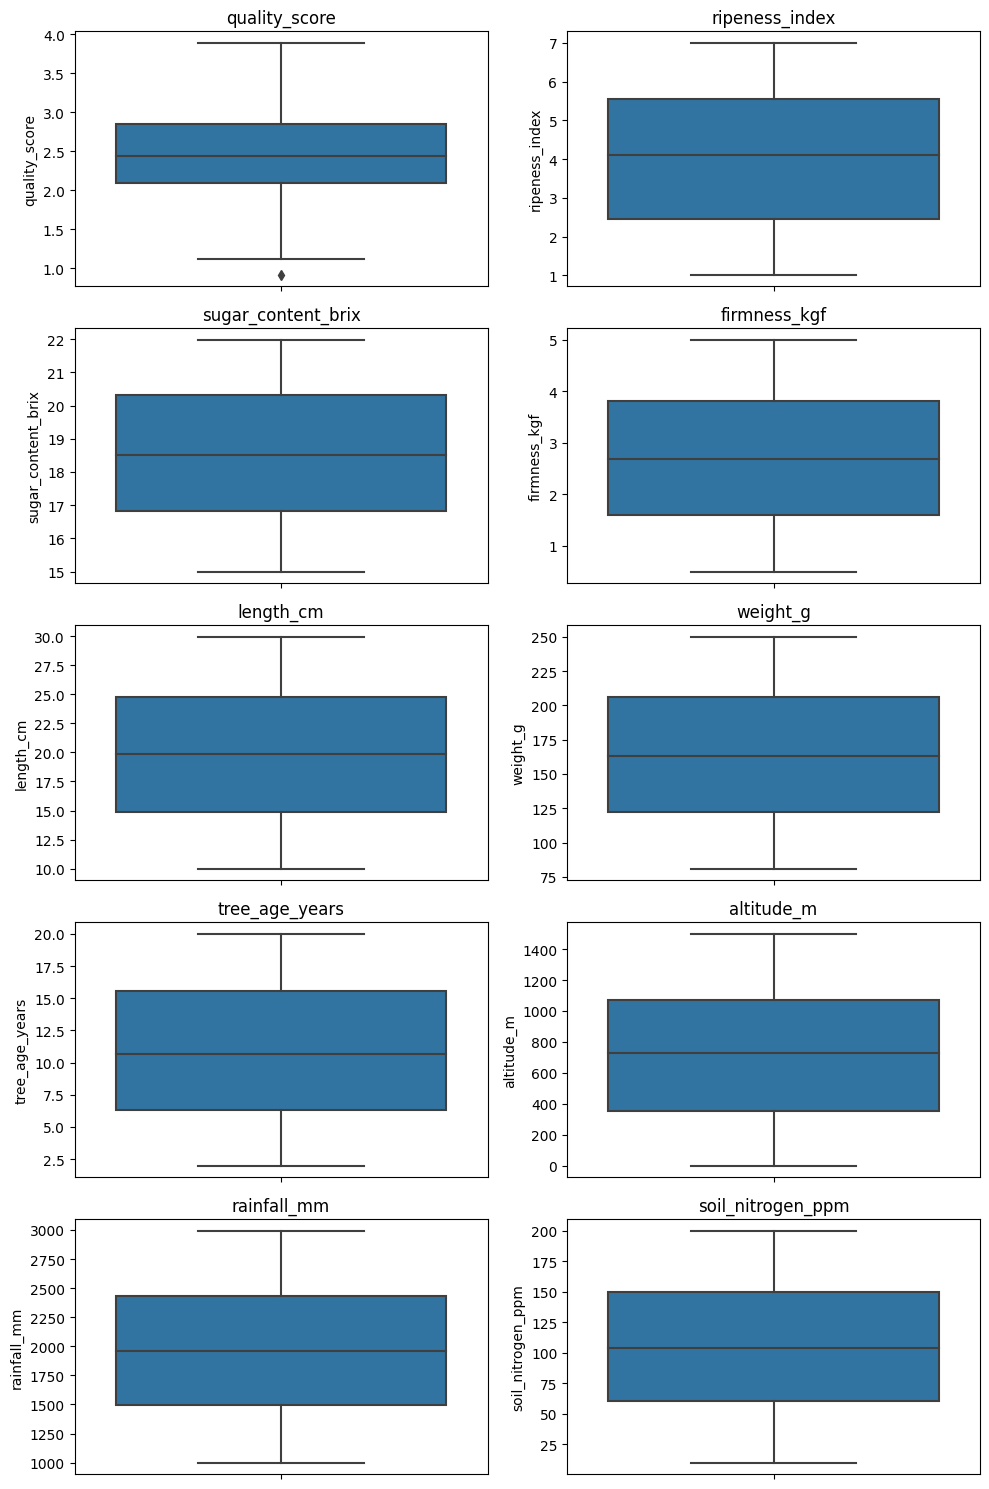

In [14]:
f, ax = plt.subplots(5,2 , figsize=(10,15))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(data= df, y= cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

## **Countplot**

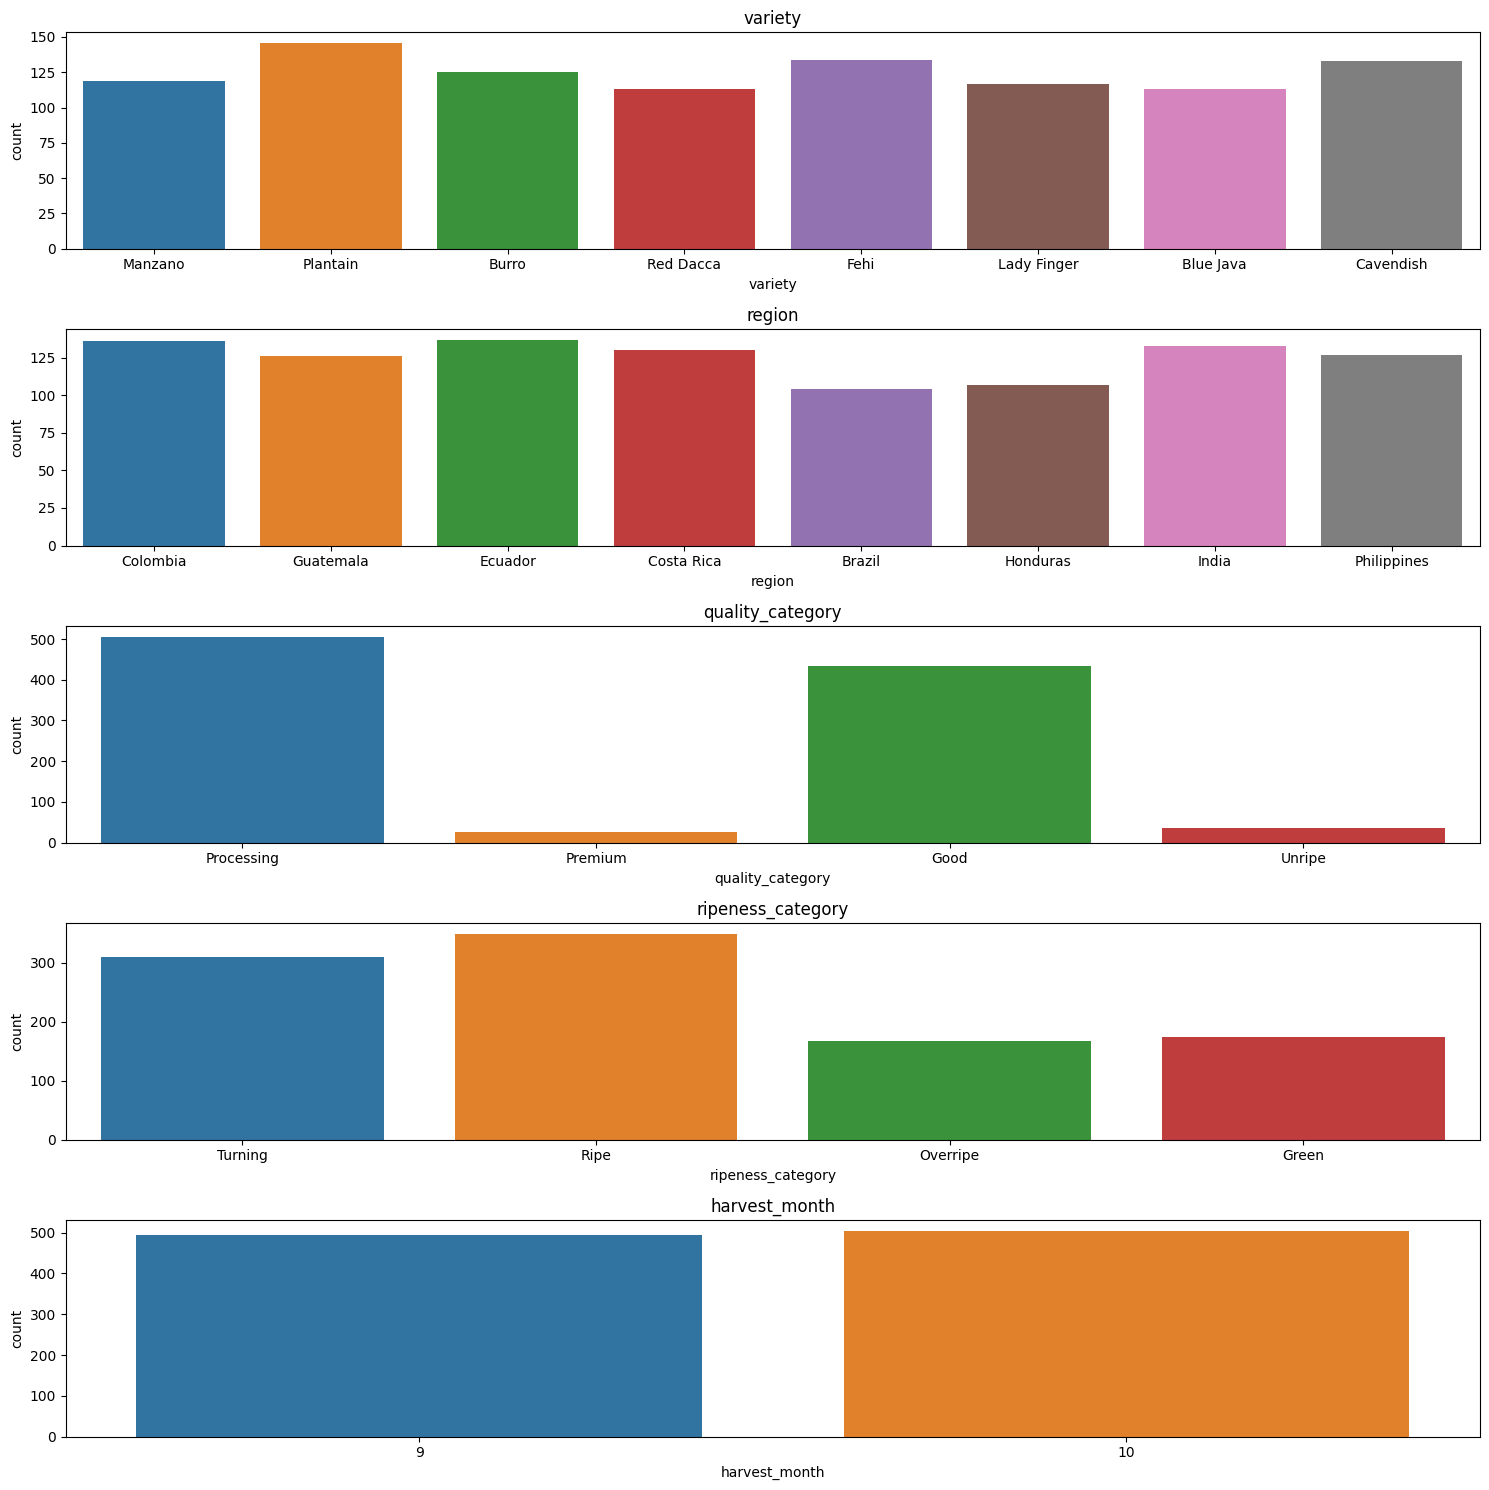

In [15]:
f, ax = plt.subplots(5,1 , figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(data= df, x= cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

## **Correlation**

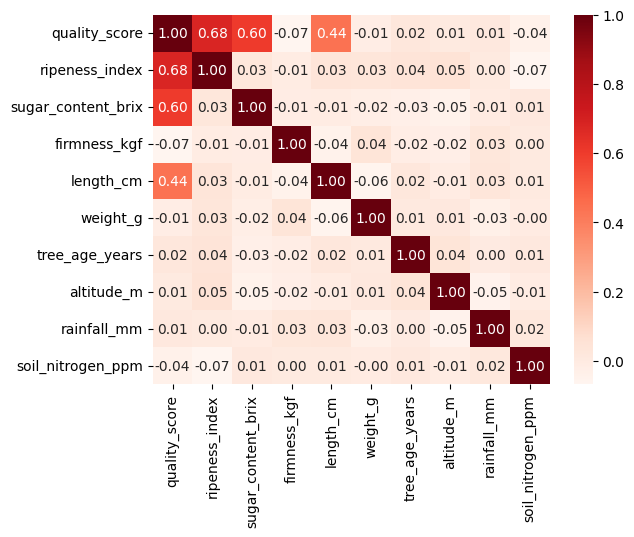

In [16]:
sns.heatmap(df[num_cols].corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

# **4.Modeling**

In [17]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

## **Preprocessing**

In [18]:
df = df.drop(columns= ['sample_id', 'harvest_date'])

## **LabelEncoding**

In [19]:
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

## **Train Test Split**

In [20]:
x = df.drop('quality_category', axis=1)
y = df['quality_category']

## **StandardSclaer**

In [21]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [22]:
x_train, x_test, y_train, y_test =train_test_split(x,y , random_state = 42, test_size= 0.2)

## **SMOTE**

In [23]:
smote = SMOTE(random_state=42)

In [24]:
X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [25]:
rfc = RandomForestClassifier(random_state=42)
abc = AdaBoostClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

models = [rfc, abc, gbc, xgb]

names = ["Random Forest", "Ada Boost",
        "Gradient Boostng", "XGBoost"]

Random Forest accuracy: 0.995
              precision    recall  f1-score   support

        Good       1.00      0.99      0.99        89
     Premium       1.00      1.00      1.00         3
  Processing       0.99      1.00      1.00       100
      Unripe       1.00      1.00      1.00         8

    accuracy                           0.99       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      0.99      0.99       200



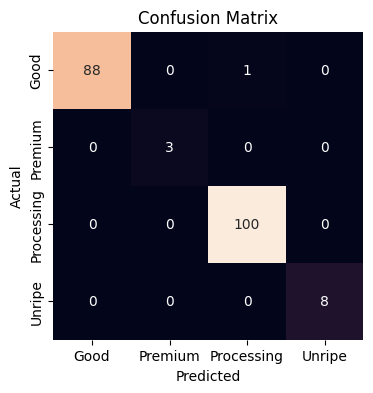

--------------------------------------------------
Ada Boost accuracy: 0.5
              precision    recall  f1-score   support

        Good       0.47      1.00      0.64        89
     Premium       1.00      1.00      1.00         3
  Processing       0.00      0.00      0.00       100
      Unripe       1.00      1.00      1.00         8

    accuracy                           0.50       200
   macro avg       0.62      0.75      0.66       200
weighted avg       0.26      0.50      0.34       200



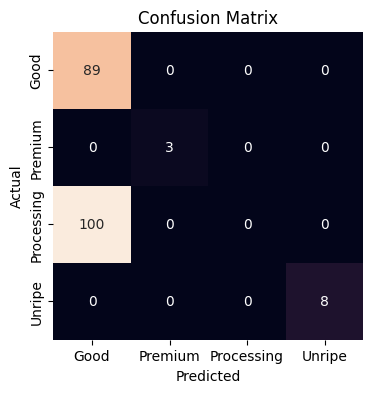

--------------------------------------------------
Gradient Boostng accuracy: 1.0
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        89
     Premium       1.00      1.00      1.00         3
  Processing       1.00      1.00      1.00       100
      Unripe       1.00      1.00      1.00         8

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



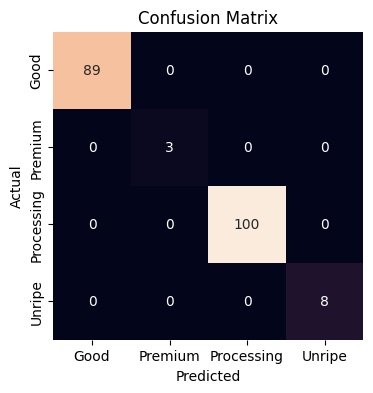

--------------------------------------------------
XGBoost accuracy: 1.0
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        89
     Premium       1.00      1.00      1.00         3
  Processing       1.00      1.00      1.00       100
      Unripe       1.00      1.00      1.00         8

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



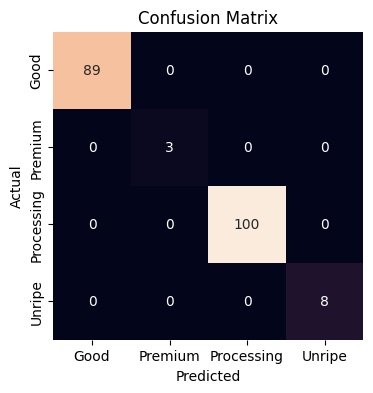

--------------------------------------------------


In [26]:
index = 0
ac = []

for name, model in enumerate(models):
    model.fit(X_train_smote, y_train_smote)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    ac.append(accuracy)
    cm = confusion_matrix(y_test, pred)
    
    print(f'{names[index]} accuracy: {accuracy}')
    print(classification_report(y_test, pred, target_names= ['Good','Premium','Processing','Unripe']))
    
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks([0.5, 1.5, 2.5,3.5], labels=['Good','Premium','Processing','Unripe'])
    plt.yticks([0.5, 1.5, 2.5,3.5], labels=['Good','Premium','Processing','Unripe'])
    plt.title('Confusion Matrix')
    plt.show()
    print("-"*50)
    index += 1

**Thankyou. Please leave your advice in the comments**